<a href="https://colab.research.google.com/github/zar7364/DataScience/blob/main/Feature_Engineering_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
data=("/content/drive/MyDrive/Colab Notebooks/Featured Engineering I/heart_failure_clinical_records_dataset.csv")

In [5]:
import pandas as pd
df=pd.read_csv(data)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [10]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
import seaborn as sns

init_notebook_mode(connected=True)  

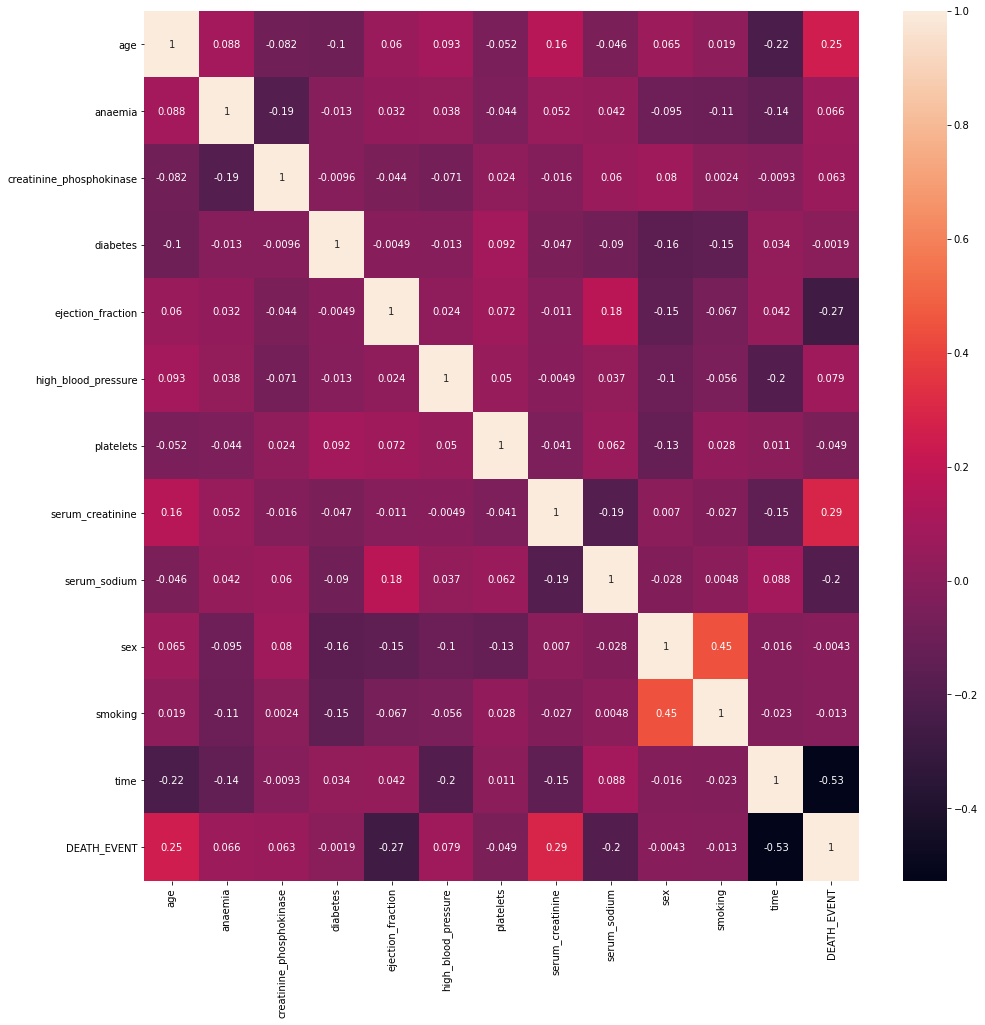

In [21]:
#Mari kita lihat hubungan antar avriabel
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True)

In [22]:
#Berdasarkan korelasi diatas dapat dilihat bahwa variabel paling tinggi yang berkorelasi dengan faktor 'Death Event' yaitu hanya age dan serum creatine.

In [23]:
#Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
y=df['DEATH_EVENT']
x=df.drop('DEATH_EVENT',axis=1)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [27]:
#Base on Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
sc=StandardScaler()
lr=LogisticRegression(max_iter=10000)
x_train=sc.fit_transform(x_train)

In [29]:
from sklearn.metrics import accuracy_score
lr.fit(x_train,y_train)
preds=lr.predict(sc.transform(x_test))
score=accuracy_score(y_test,preds)
score

0.35

In [30]:
rfe_lr=RFE(estimator=lr,n_features_to_select=9,verbose=1)
rfe_lr.fit(x_train,y_train)
rfe_lr.score(sc.transform(x_test),y_test)

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.


0.35

In [32]:
lr_mask=rfe_lr.support_
x.columns[rfe_lr.support_]

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction',
       'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'time'],
      dtype='object')

In [33]:
dict(zip(x.columns,rfe_lr.ranking_))

{'age': 1,
 'anaemia': 1,
 'creatinine_phosphokinase': 1,
 'diabetes': 3,
 'ejection_fraction': 1,
 'high_blood_pressure': 2,
 'platelets': 1,
 'serum_creatinine': 1,
 'serum_sodium': 1,
 'sex': 1,
 'smoking': 4,
 'time': 1}

In [35]:
#Base on Feature Selection
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.feature_importances_

array([0.10175627, 0.01557681, 0.08961338, 0.01371428, 0.10629664,
       0.01209874, 0.07880588, 0.16093622, 0.07881015, 0.0167828 ,
       0.01178369, 0.31382514])

In [36]:
mask=rfc.feature_importances_ >0.1
x_reduced=x.loc[:,mask]
print(x_reduced.columns)

Index(['age', 'ejection_fraction', 'serum_creatinine', 'time'], dtype='object')


In [38]:
#RFE Random Forest
rfe_rfc=RFE(estimator=rfc,n_features_to_select=9,verbose=1)
rfe_rfc.fit(x_train,y_train)
rfe_rfc.score(sc.transform(x_test),y_test)
rfc_mask=rfe_rfc.support_

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.


In [40]:
x.columns[rfe_rfc.support_]

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'time'],
      dtype='object')

In [41]:
dict(zip(x.columns,rfe_rfc.ranking_))

{'age': 1,
 'anaemia': 1,
 'creatinine_phosphokinase': 1,
 'diabetes': 3,
 'ejection_fraction': 1,
 'high_blood_pressure': 1,
 'platelets': 1,
 'serum_creatinine': 1,
 'serum_sodium': 1,
 'sex': 4,
 'smoking': 2,
 'time': 1}

In [42]:
dict(zip(x.columns,rfe_rfc.ranking_))

{'age': 1,
 'anaemia': 1,
 'creatinine_phosphokinase': 1,
 'diabetes': 3,
 'ejection_fraction': 1,
 'high_blood_pressure': 1,
 'platelets': 1,
 'serum_creatinine': 1,
 'serum_sodium': 1,
 'sex': 4,
 'smoking': 2,
 'time': 1}

In [75]:
rfe_rfc.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True])

In [43]:
#Feature Engineering:GradientBoosting

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
rfe_gb = RFE(estimator=gbc, 
             n_features_to_select=9, step=3, verbose=1)
rfe_gb.fit(x_train, y_train)

Fitting estimator with 12 features.


RFE(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                         criterion='friedman_mse', init=None,
                                         learning_rate=0.1, loss='deviance',
                                         max_depth=3, max_features=None,
                                         max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=100,
                                         n_iter_no_change=None,
                                         presort='deprecated',
                                         random_state=None, subsample=1.0,
                                         tol=0.0001, validation_f

In [44]:
rfe_gb.score(sc.transform(x_test),y_test)

0.35

In [73]:
rfe_gb_mask = rfe_gb.support_


In [47]:
import numpy as np
votes=np.sum([lr_mask,rfe_gb_mask,rfc_mask],axis=0)
print(votes)

[3 2 3 0 3 2 3 3 3 2 0 3]


In [72]:
print(lr_mask)
print(rfe_gb_mask)
print(rfc_mask)

[ True  True  True False  True False  True  True  True  True False  True]
[ True False  True False  True  True  True  True  True  True False  True]
[ True  True  True False  True  True  True  True  True False False  True]


In [48]:
final_mask=votes>=3
x_final=x.loc[:,final_mask]

In [50]:
x_final.columns

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')

In [53]:
#Then got optimum 

features=df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'sex','platelets','time']]

In [54]:
from sklearn.model_selection import train_test_split
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(features,y,test_size=0.2,random_state=12)

In [55]:
x_train_std=sc.fit_transform(x_train_1)

In [56]:
gbc.fit(x_train_std,y_train_1)
preds_1=gbc.predict(sc.transform(x_test_1))
score_1=accuracy_score(y_test_1,preds_1)

In [58]:
score_1 *100

90.0

<Figure size 432x288 with 0 Axes>

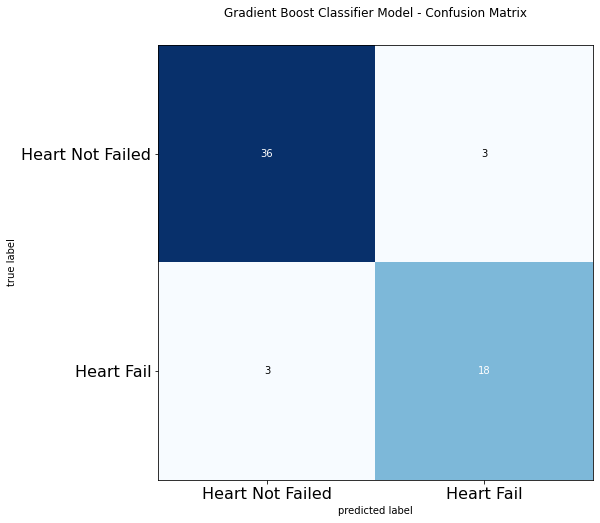

In [59]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test_1, preds_1)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gradient Boost Classifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [60]:
rfc.fit(x_train_std,y_train_1)
preds_2=rfc.predict(sc.transform(x_test_1))
score_2=accuracy_score(y_test_1,preds_2)

In [62]:
score_2 *100

90.0

<Figure size 432x288 with 0 Axes>

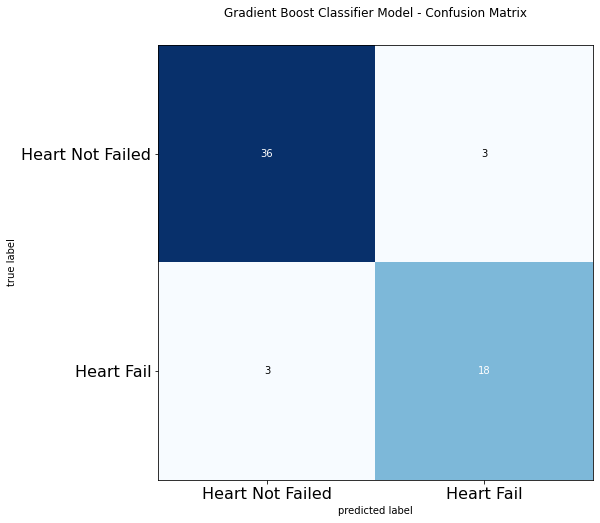

In [63]:
cm = confusion_matrix(y_test, preds_2)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gradient Boost Classifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [64]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train_std,y_train_1)
preds_3=svm.predict(sc.transform(x_test_1))
score_3=accuracy_score(y_test_1,preds_3)

In [65]:
score_3 *100

76.66666666666667

<Figure size 432x288 with 0 Axes>

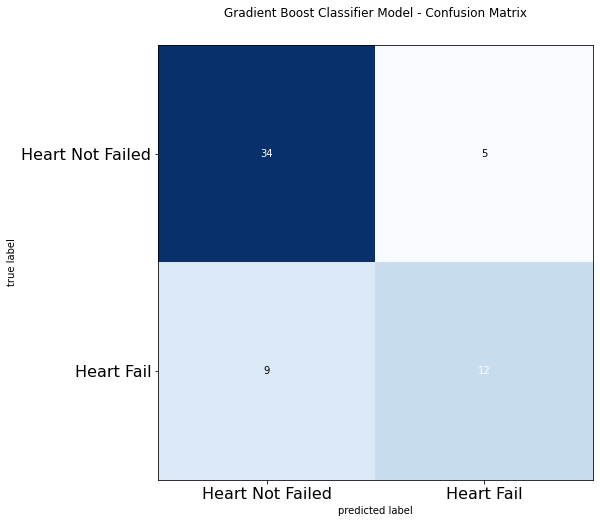

In [66]:
cm = confusion_matrix(y_test, preds_3)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gradient Boost Classifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()